Current average score is 84.58, grade is B.
Future prediction based on current performance:
If I steadily improve, the final predicted score will be 84.09, grade will be B.
If I maintain my current level, the final predicted score will be 84.59, grade will be B.
If I gradually decline, the final predicted score will be 82.04, grade will be B-.
To raise my future score by one grade, I need to score at least 87.00 in the next exam.


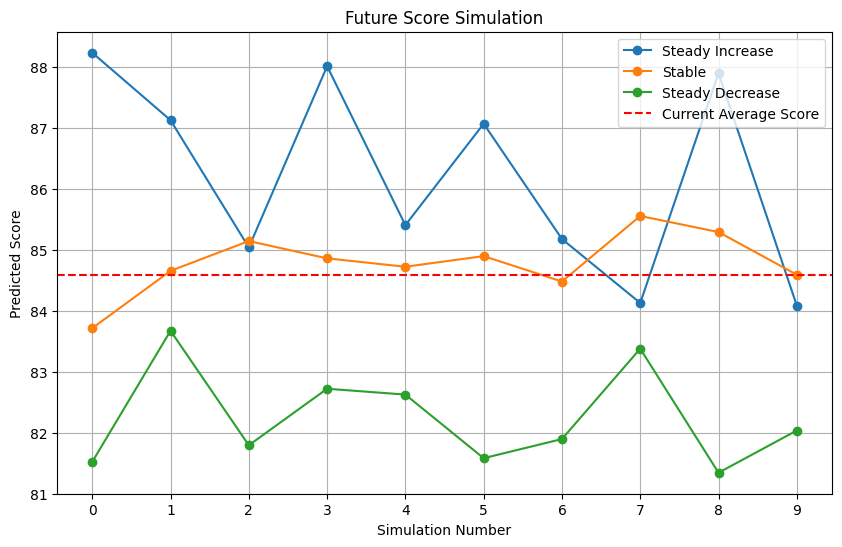

In [35]:
# 导入必要的库
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 创建示例数据
data = {
    'student_id': [1] * 6,  # Only one student, repeated for each entry
    'subject': ['HW', 'HW', 'HW', 'Quiz', 'Exams', 'Exams'],  # List all subjects for one student
    'past_scores': [[85, 88, 90], [92, 95, 94], [87, 90, 89], [75], [78, 74], [88, 85]],  # Scores for each assessment
}

df = pd.DataFrame(data)

# 定义加权平均函数
def weighted_average(past_scores, weights):
    return np.average(past_scores, weights=weights)

# Weights dictionary
weights_dict = {
    'HW': np.array([0.3 / 3] * 3),  # 30% for 3 HW scores
    'Quiz': np.array([0.2 / 1] * 1),  # 20% for 1 Quiz score
    'Exams': np.array([0.5 / 2] * 2),  # 50% for 2 Exam scores
}

# 计算加权平均成绩
df['average_score'] = [
    weighted_average(score, weights_dict['HW']) if subject == 'HW' else
    weighted_average(score, weights_dict['Quiz']) if subject == 'Quiz' else
    weighted_average(score, weights_dict['Exams'])
    for subject, score in zip(df['subject'], df['past_scores'])
]

# 假设未来成绩与平均成绩存在一定的线性关系
df['future_score'] = df['average_score'] + np.random.randn(len(df)) * 2  # 加入一些噪声

# 特征和目标变量
X = df[['average_score']]
y = df['future_score']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 定义成绩等级评估函数
def evaluate_grade(score):
    if score >= 97:
        return 'A+'
    elif score >= 93:
        return 'A'
    elif score >= 90:
        return 'A-'
    elif score >= 87:
        return 'B+'
    elif score >= 83:
        return 'B'
    elif score >= 80:
        return 'B-'
    elif score >= 77:
        return 'C+'
    elif score >= 73:
        return 'C'
    elif score >= 70:
        return 'C-'
    elif score >= 67:
        return 'D+'
    elif score >= 63:
        return 'D'
    elif score >= 60:
        return 'D-'
    else:
        return 'F'

# 模拟成绩的情况
def simulate_future_scores():
    future_scores_up = []   # Steady increase
    future_scores_stable = []  # Stable
    future_scores_down = []  # Steady decrease

    # 模拟的基础成绩
    current_average_score = df['average_score'].mean()
    current_max_score = df['average_score'].max()
    current_min_score = df['average_score'].min()
    score_std_dev = np.std(df['average_score'])  # 计算已有数据的标准差
    
    for i in range(10):  # 模拟10次成绩
        # 稳步上升：每次加-1%到5%之间的随机百分比
        percentage_increase = np.random.uniform(-0.01, 0.05)  # -1% to +5%
        future_scores_up.append(
            min(
                current_average_score * (1 + percentage_increase),  # Apply the percentage increase
                current_max_score
            )
        )
        
        # 稳定波动：保持在当前成绩附近，加一些小的波动
        future_scores_stable.append(min(current_average_score + np.random.uniform(-1, 1), 100))

        # 稳步下降：每次减1到2分，并添加一个随机波动
        future_scores_down.append(
            max(
                current_average_score - (1 + i * 0.1) + np.random.normal(0, score_std_dev / 5),
                current_min_score - 10  # 允许低于最低分10分
            )
        )
    
    return future_scores_up, future_scores_stable, future_scores_down

# 获取未来成绩
future_scores_up, future_scores_stable, future_scores_down = simulate_future_scores()

# 最终成绩和等级
final_score_up = future_scores_up[-1]
final_score_stable = future_scores_stable[-1]
final_score_down = future_scores_down[-1]

# 输出保持现有成绩及其等级
current_average_score = df['average_score'].mean()
current_grade = evaluate_grade(current_average_score)
print(f"Current average score is {current_average_score:.2f}, grade is {current_grade}.")

# 定义下一个等级对应的最低分
def next_grade_threshold(current_grade):
    thresholds = {
        'A+': 97,
        'A': 93,
        'A-': 90,
        'B+': 87,
        'B': 83,
        'B-': 80,
        'C+': 77,
        'C': 73,
        'C-': 70,
        'D+': 67,
        'D': 63,
        'D-': 60,
        'F': 0
    }
    
    # 找到当前等级对应的分数
    if current_grade in thresholds:
        current_threshold = thresholds[current_grade]
        # 找到下一个等级的分数
        next_threshold = min([thresh for grade, thresh in thresholds.items() if thresh > current_threshold], default=100)
        return next_threshold
    return 100

# 计算提高一个等级所需的分数
required_score_for_up = next_grade_threshold(current_grade)

# 输出结果
print("Future prediction based on current performance:")
print(f"If I steadily improve, the final predicted score will be {final_score_up:.2f}, grade will be {evaluate_grade(final_score_up)}.")
print(f"If I maintain my current level, the final predicted score will be {final_score_stable:.2f}, grade will be {evaluate_grade(final_score_stable)}.")
print(f"If I gradually decline, the final predicted score will be {final_score_down:.2f}, grade will be {evaluate_grade(final_score_down)}.")
print(f"To raise my future score by one grade, I need to score at least {required_score_for_up:.2f} in the next exam.")

# 绘制成绩曲线
plt.figure(figsize=(10, 6))
plt.plot(future_scores_up, label='Steady Increase', marker='o')
plt.plot(future_scores_stable, label='Stable', marker='o')
plt.plot(future_scores_down, label='Steady Decrease', marker='o')

# 更新Y轴范围为当前成绩的最小值和最大值
plt.axhline(y=current_average_score, color='r', linestyle='--', label='Current Average Score')
plt.title('Future Score Simulation')
plt.xlabel('Simulation Number')
plt.ylabel('Predicted Score')
plt.xticks(range(10))
plt.legend()
plt.grid()
plt.show()
